In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [139]:
data = pd.read_csv('startups.csv')

In [140]:
df = data.copy()

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [142]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [143]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


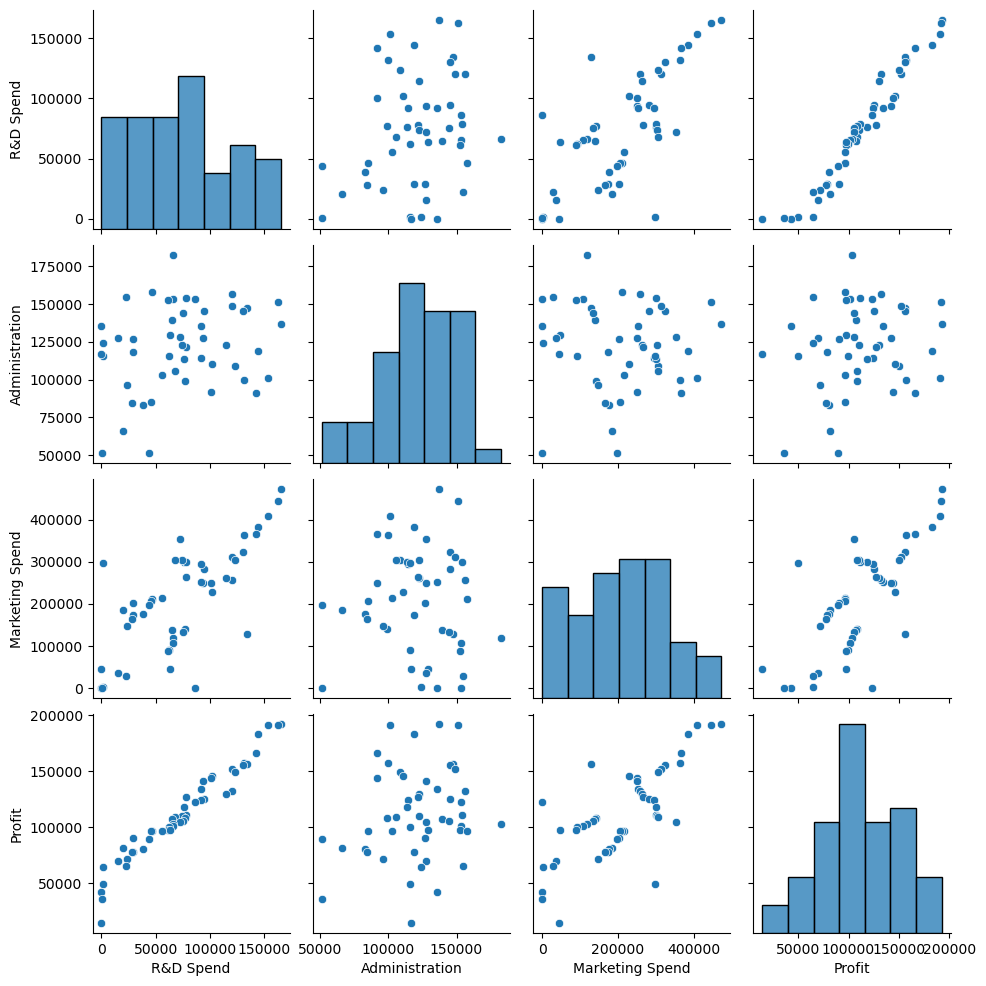

In [144]:
plt.Figure(figsize=(8,6))
sns.pairplot(df)

In [145]:
from sklearn.preprocessing import LabelEncoder

In [146]:
le= LabelEncoder()

In [147]:
df['State']= le.fit_transform(df['State'])

<Axes: >

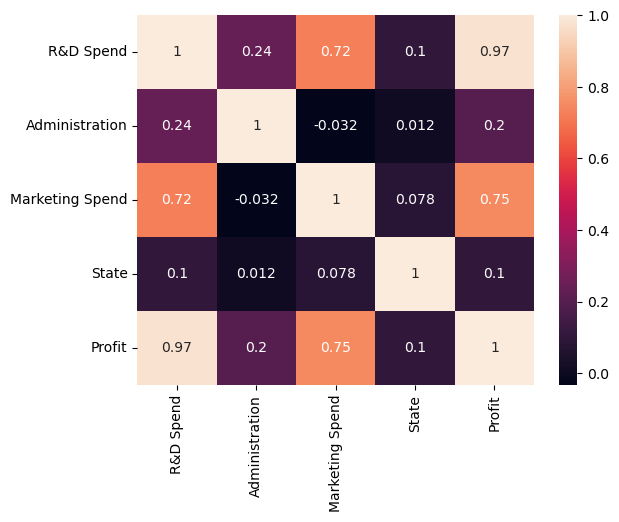

In [148]:
plt.Figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

In [149]:
df = df.drop(columns=['Administration', 'State'])

<Axes: >

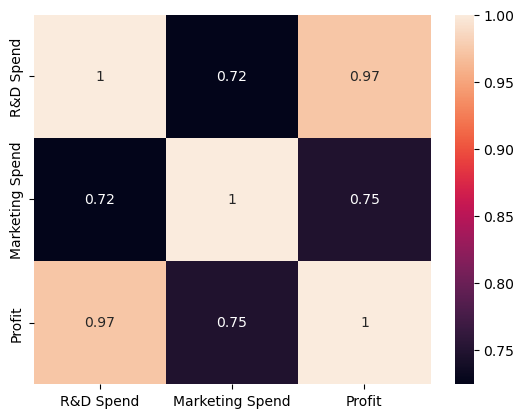

In [150]:
sns.heatmap(df.corr(),annot= True)

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()

In [156]:
cols = ['R&D Spend', 'Marketing Spend','Profit']

df[cols] = scaler.fit_transform(df[cols])

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Marketing Spend  50 non-null     float64
 2   Profit           50 non-null     float64
dtypes: float64(3)
memory usage: 1.3 KB


In [162]:
x = df.drop('Profit',axis=1)
y = df['Profit']

In [159]:
from sklearn.model_selection import train_test_split

In [164]:
x_train,x_test,y_trian,y_test = train_test_split(x,y,test_size=0.20,random_state=44,shuffle= True)

In [165]:
from sklearn.linear_model import LinearRegression

In [166]:
reg = LinearRegression()

In [167]:
reg.fit(x_train,y_trian)

LinearRegression()

In [168]:
y_pred = reg.predict(x_test)

In [169]:
from sklearn.metrics import r2_score

In [170]:
print(r2_score(y_test,y_pred))

0.9625811578682718
